<a href="https://colab.research.google.com/github/HARI1811229/car-price-detection-/blob/main/car_price_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
cardata=pd.read_csv('/content/car data.csv')


In [ ]:
cardata.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cardata.shape

(301, 9)

In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(cardata.Fuel_Type.value_counts())
print(cardata.Seller_Type.value_counts())
print(cardata.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
cardata.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cardata.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
cardata.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
cardata.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [ ]:
x=cardata.drop(['Car_Name','Selling_Price'],axis=1)

In [ ]:
y=cardata['Selling_Price']

In [ ]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=0)


In [ ]:
print(xtest)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
223  2015          9.400       61381          1            0             0   
150  2011          0.826        6000          0            1             0   
226  2015          5.700       24678          0            0             0   
296  2016         11.600       33988          1            0             0   
52   2017         19.770       15000          1            0             1   
261  2016          5.970        5600          0            0             0   
246  2012          6.790       35000          0            0             0   
166  2016          0.550        1000          0            1             0   
221  2013          6.790       32000          0            0             1   
215  2012          9.400       36100          0            0             0   
225  2011          4.600       22517          0            0             0   
133  2016          0.950         500          0            1    

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(xtrain,ytrain)
print(xtrain)
print(ytrain)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
253  2014           9.90       48000          1            0             0   
144  2014           0.99       25000          0            1             0   
8    2016           8.89       20273          1            0             0   
271  2009          10.00       69562          0            0             0   
111  2016           1.50        8700          0            1             0   
..    ...            ...         ...        ...          ...           ...   
251  2013           9.90       56701          0            0             0   
192  2007           0.75       49000          0            1             0   
117  2015           1.90       14000          0            1             0   
47   2006           4.15       65000          0            0             0   
172  2014           0.64       13700          0            1             0   

     Owner  
253      0  
144      0  
8        0  
271      0 

In [ ]:
pre_ytrain=lin_reg_model.predict(xtrain)


In [ ]:
err_score=metrics.r2_score(ytrain,pre_ytrain)
print(err_score)

0.8787289819887416


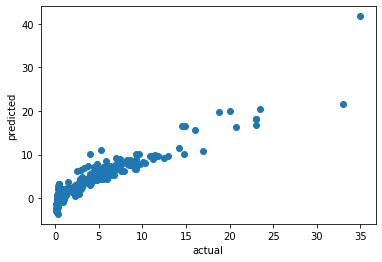

In [ ]:
plt.scatter(ytrain,pre_ytrain)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()


0.9284319234692716


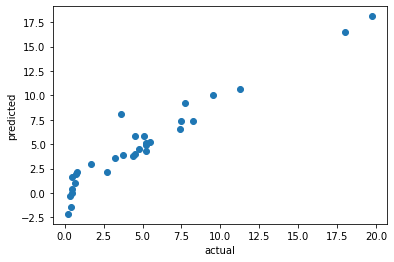

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(xtest,ytest)
pre_ytest=lin_reg_model.predict(xtest)
err_score=metrics.r2_score(ytest,pre_ytest)
print(err_score)
plt.scatter(ytest,pre_ytest)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [ ]:
import numpy as np

In [ ]:
criteria=np.array([[2014,0.826,30000,0,1,0,0]])
pre_ytest=lin_reg_model.predict(criteria)
print("pridected data",pre_ytest)

pridected data [0.57408592]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
